### Introduction to Pandas

* Data analysis tool in Python

* DataFrame
     - an ordinary **table of data** consisting of **rows and columns**
     
     - **index**, **columns**, **data** (also known as **values**)
<center><img src="resources/Pandas-display.png" width="800"></center>

*  Series
    - A single column of data from a DataFrame
    
    - Composed of just an **index** and the **data**
<center><img src="resources/Series-display.png" width="800"></center>

### Import Functions

Pandas is a library used to load, manipulate, and analyze data. SciKitLearn, a machine learning library, is compatible with pandas.

Our first step is to import pandas with the alias pd.

In [1]:
import pandas as pd


### Iris Dataset Revisited

Next, we'll load iris2.csv using pd.read_csv()

In [2]:
iris = pd.read_csv("iris2.csv")

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
sepal_length    150 non-null float64
sepal_width     149 non-null float64
petal_length    150 non-null float64
petal_width     149 non-null float64
color           150 non-null object
flower          150 non-null object
species         150 non-null object
dtypes: float64(4), object(3)
memory usage: 8.3+ KB


What can you tell me about the data? How many entries and columns does this have?

This dataset requires preprocessing before we can fit it into our model.

### Adding/Deleting columns and rows 

First, we need to take care of rows with missing values. Let's find out how many missing values we have.

In [4]:
iris.isna().sum()

sepal_length    0
sepal_width     1
petal_length    0
petal_width     1
color           0
flower          0
species         0
dtype: int64

Since the number of missing values is relatively small, we can delete the rows with missing values with dropna().
We could also fill in missing values with a default value.

In [5]:
iris = iris.dropna()
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
color           0
flower          0
species         0
dtype: int64

We can also drop columns that we don't need. 

These are all flowers, so we can drop the flower column.

In [6]:
iris = iris.drop(columns = ["flower"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,color,species
0,5.1,3.5,1.4,0.2,light,setosa
1,4.9,3.0,1.4,0.2,light,setosa
3,4.6,3.1,1.5,0.2,dark,setosa
4,5.0,3.6,1.4,0.2,medium,setosa
5,5.4,3.9,1.7,0.4,light,setosa


We can drop rows that we don't need.

If we only wanted to classify versicolors and virginicas, we can drop all rows of setosas.

In [7]:
setosa_indexes = iris[iris.species == "setosa"].index
iris = iris.drop(setosa_indexes)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,color,species
50,7.0,3.2,4.7,1.4,medium,versicolor
51,6.4,3.2,4.5,1.5,medium,versicolor
52,6.9,3.1,4.9,1.5,medium,versicolor
53,5.5,2.3,4.0,1.3,medium,versicolor
54,6.5,2.8,4.6,1.5,medium,versicolor


### Changing data types

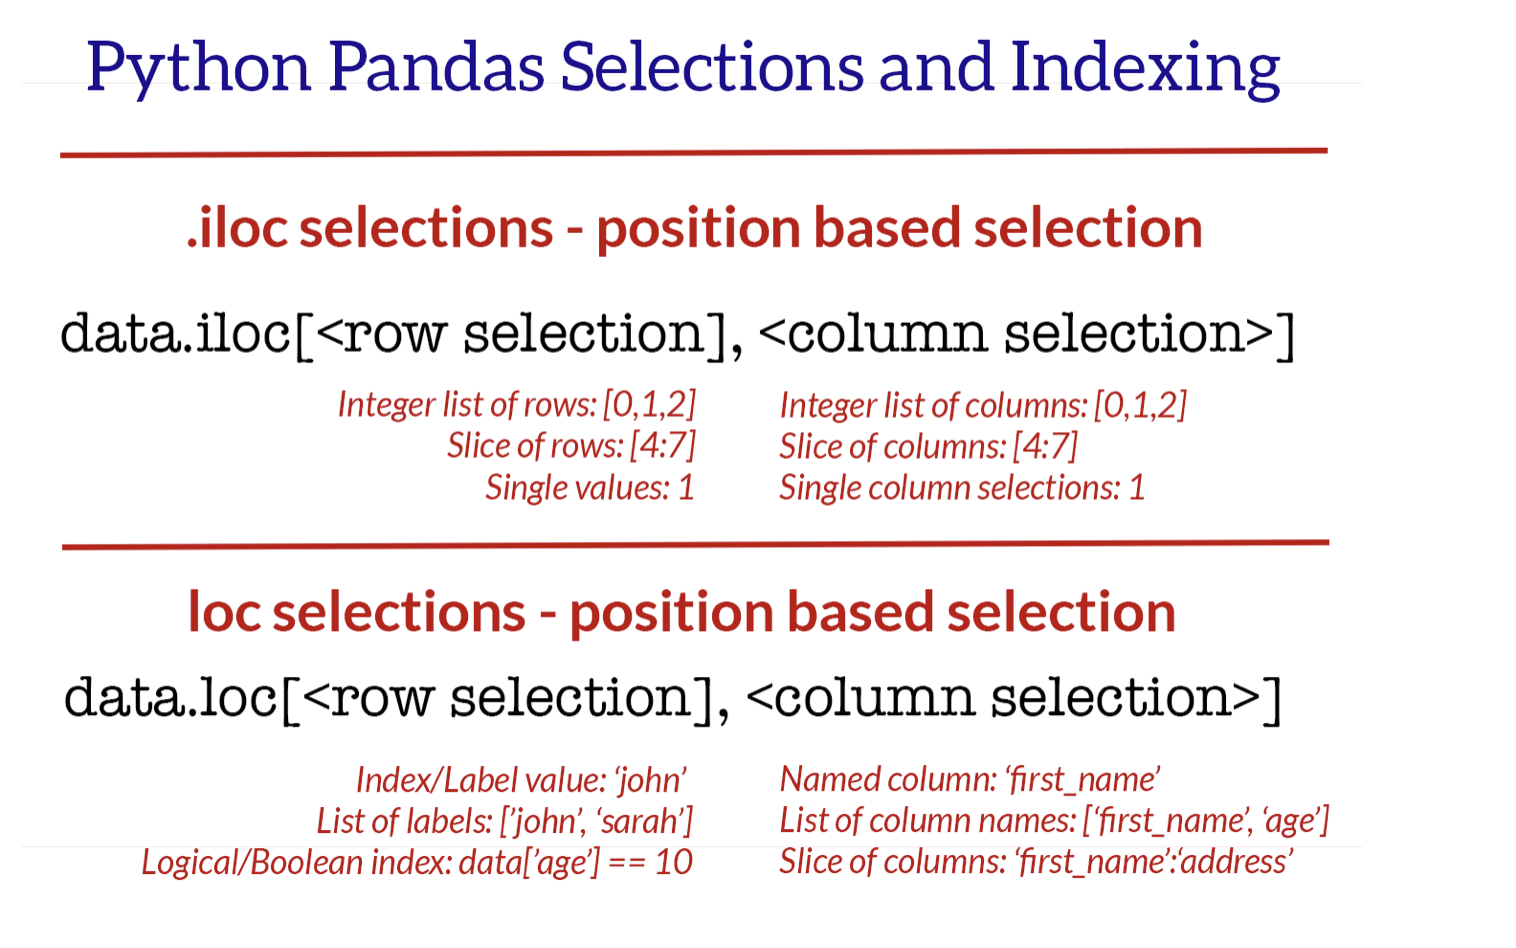

Now we can separate X and Y variables. We want the first 5 columns for x, and the 6th column for y.

Indexing starts at 0.

In [8]:
X = iris.iloc[:, 0:5] #all the rows, and column 0 to column 4
y = iris.iloc[:, 5]#all the rows, and column 5

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,color
50,7.0,3.2,4.7,1.4,medium
51,6.4,3.2,4.5,1.5,medium
52,6.9,3.1,4.9,1.5,medium
53,5.5,2.3,4.0,1.3,medium
54,6.5,2.8,4.6,1.5,medium


Since color is a category, we must create dummy variables to represent the values of light, medium, and dark.

Also known as one hot encoding, we create a column for each possible value.

In [10]:
X = pd.get_dummies(X)
X.head()

,sepal_length,sepal_width,petal_length,petal_width,color_dark,color_light,color_medium
50,7.0,3.2,4.7,1.4,0,0,1
51,6.4,3.2,4.5,1.5,0,0,1
52,6.9,3.1,4.9,1.5,0,0,1
53,5.5,2.3,4.0,1.3,0,0,1
54,6.5,2.8,4.6,1.5,0,0,1


### Reference

- Pandas Cookbook by Theodore Petrou

- https://thispointer.com/pandas-read-csv-file-to-dataframe-with-custom-delimiter-in-python/